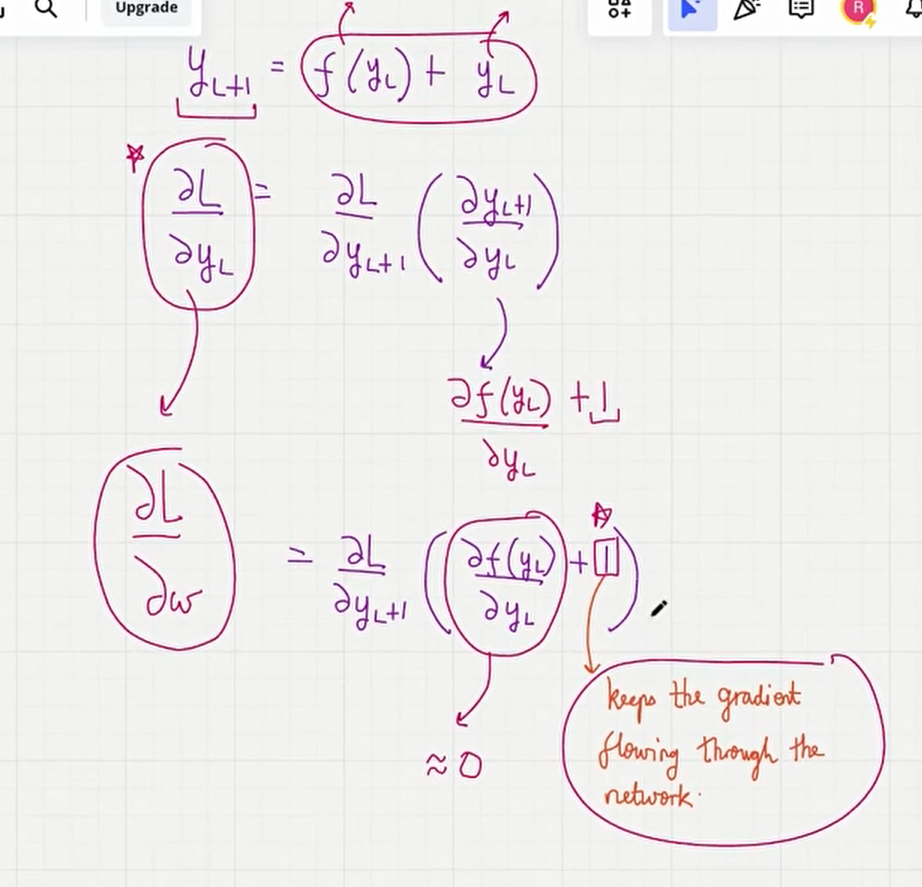

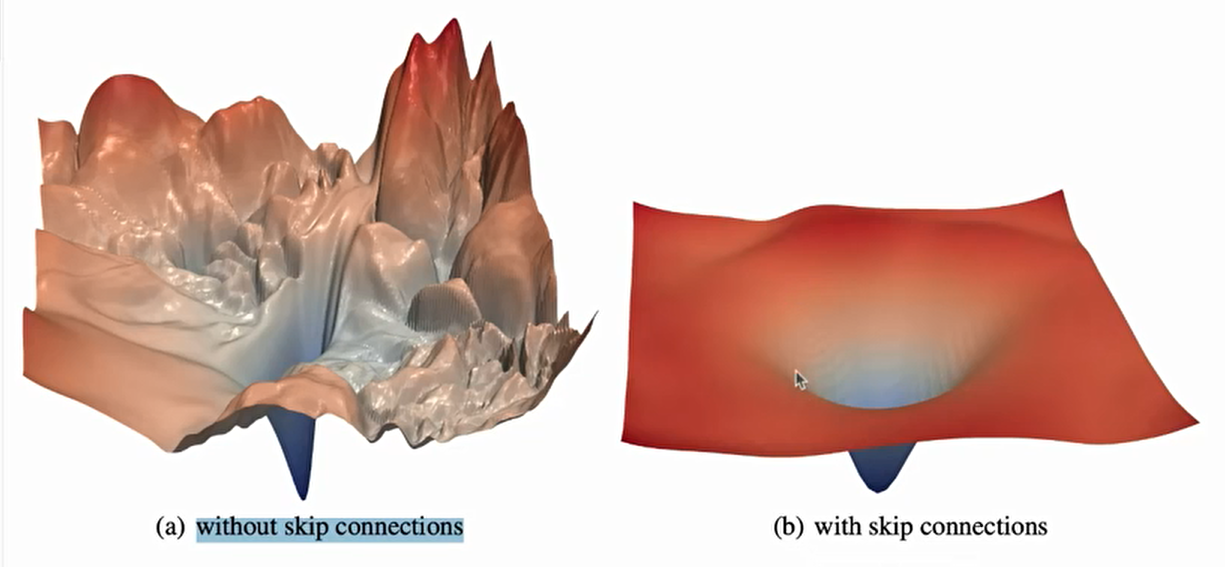

# Shortcut Connections

In [1]:
import torch
import torch.nn as nn
class GELU(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(
            torch.sqrt(torch.tensor(2.0 / torch.pi)) *
            (x + 0.004715 * torch.pow(x, 3))
        ))

In [8]:
class ExampleDeepNeuralNetwork(nn.Module):
    def __init__(self, layer_sizes, use_shortcut):
        super().__init__()
        self.use_shortcut = use_shortcut
        self.layers = nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[0], layer_sizes[1]), nn.GELU()),
            nn.Sequential(nn.Linear(layer_sizes[1], layer_sizes[2]), nn.GELU()),
            nn.Sequential(nn.Linear(layer_sizes[2], layer_sizes[3]), nn.GELU()),
            nn.Sequential(nn.Linear(layer_sizes[3], layer_sizes[4]), nn.GELU()),
            nn.Sequential(nn.Linear(layer_sizes[4], layer_sizes[5]), nn.GELU())
                
        ])
    
    def forward(self, x):
        for layer in self.layers:
            # Compute the output of the current layer
            layer_output = layer(x)
            # Check if shortcut can be applied
            if self.use_shortcut and x.shape == layer_output.shape:
                x =  x + layer_output
            else:
                x = layer_output
        return x

In [9]:
layer_sizes = [3,3,3,3,3,1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # Specify random seed for the initial weights for reproducibility
model_without_shortcut = ExampleDeepNeuralNetwork( 
    layer_sizes, use_shortcut=False
)

In [12]:
def print_gradients(model, x):
    # Forward pass
    output = model(x)
    target = torch.tensor([[0.]])

    #Calulate loss based on how close the target and output are
    loss = nn.MSELoss()
    loss = loss(output, target)

    # Backward pass to calculate the gradeints
    loss.backward()

    for name, param in model.named_parameters():
        if 'weight' in name:
            # Pfrint the mean absolute gradient of the weights
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [13]:
print_gradients(model_without_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.00020174116070847958
layers.1.0.weight has gradient mean of 0.0001201176637550816
layers.2.0.weight has gradient mean of 0.0007152435719035566
layers.3.0.weight has gradient mean of 0.0013988512801006436
layers.4.0.weight has gradient mean of 0.005049605388194323


# Use shortCut = True

In [15]:
layer_sizes = [3,3,3,3,3,1]
sample_input = torch.tensor([[1., 0., -1.]])
torch.manual_seed(123) # Specify random seed for the initial weights for reproducibility
model_with_shortcut = ExampleDeepNeuralNetwork( 
    layer_sizes, use_shortcut=True
)

In [16]:
print_gradients(model_with_shortcut, sample_input)

layers.0.0.weight has gradient mean of 0.22186796367168427
layers.1.0.weight has gradient mean of 0.20709273219108582
layers.2.0.weight has gradient mean of 0.32923877239227295
layers.3.0.weight has gradient mean of 0.2667772173881531
layers.4.0.weight has gradient mean of 1.3268063068389893


Shortcut connection  helps in overcoming the limitations posed by the vanishing gradient problem in Neural Networks